In [1]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, Bidirectional
from keras.optimizers import Adam
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import np_utils
#sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


362237


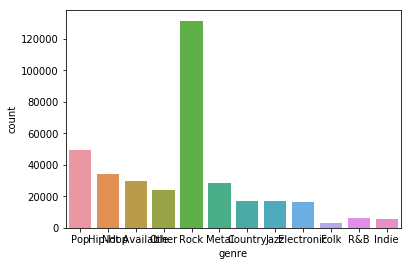

In [2]:
df = pd.read_pickle('../lyrics.pkl', compression='gzip')
print(len(df))
sns.countplot(df.genre)

In [3]:
#probably a better way to do this
df = df[(df.genre == 'Pop') | (df.genre == 'Hip-Hop') | (df.genre == 'Metal') | (df.genre == 'Rock')]
df.dropna(inplace=True)
df.groupby('genre').nunique('genre')

,index,song,year,artist,genre,lyrics
genre,,,,,,
Hip-Hop,24850,21479,32,1107,1,22648
Metal,23759,21852,33,996,1,22498
Pop,40466,32443,47,2066,1,37229
Rock,109235,85240,48,3765,1,102512


4000


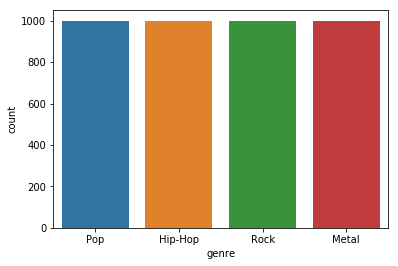

In [4]:
#also probably a better way to do this using 28408 because that is the smallest count
pop = df.loc[df['genre']=='Pop'].head(1000)
hiphop = df.loc[df['genre']=='Hip-Hop'].head(1000)
rock = df.loc[df['genre']=='Rock'].head(1000)
metal = df.loc[df['genre']=='Metal'].head(1000)
#really ratchet
output = pop.append(hiphop)
output = output.append(rock)
output = output.append(metal)
output.dropna(inplace=True)
output.reset_index(drop=True, inplace=True)
print(len(output))
#but it works...
sns.countplot(output.genre)

# preprocess data
-  make our 10 word sequences integer encoded
- use one-hot encoding to encode our genres

creating our feature set w/Keras tokenizer class

In [5]:



#this value is the length of the longest song in our dataset.

tok = Tokenizer(num_words=MAX_VALUE)
tok.fit_on_texts(df.lyrics)
#build sequences
sequences = tok.texts_to_sequences(output.lyrics)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=MAX_VALUE)
sequences_matrix

KeyboardInterrupt: 

creating our target variables

In [7]:
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(output.genre)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### split into test/train 80/20 split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(sequences_matrix,onehot_encoded,test_size=0.2)

In [21]:
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [22]:
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])

Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 0s 13us/step - loss: 1.3882 - acc: 0.2731 - val_loss: 1.3820 - val_acc: 0.2891
Epoch 2/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3792 - acc: 0.2907 - val_loss: 1.3769 - val_acc: 0.2926
Epoch 3/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3757 - acc: 0.2913 - val_loss: 1.3760 - val_acc: 0.2862
Epoch 4/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3725 - acc: 0.2968 - val_loss: 1.3732 - val_acc: 0.2924
Epoch 5/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3706 - acc: 0.2958 - val_loss: 1.3683 - val_acc: 0.3001
Epoch 6/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3685 - acc: 0.2988 - val_loss: 1.3662 - val_acc: 0.2984
Epoch 7/100
30589/30589 [==============================] - 0s 10us/step - loss: 1.3668 - acc: 0.3006 - val_loss: 1.3639 - val_ac

Epoch 60/100
30589/30589 [==============================] - 0s 12us/step - loss: 1.3451 - acc: 0.3284 - val_loss: 1.3569 - val_acc: 0.3333
Epoch 61/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3451 - acc: 0.3287 - val_loss: 1.3549 - val_acc: 0.3228
Epoch 62/100
30589/30589 [==============================] - 0s 9us/step - loss: 1.3449 - acc: 0.3341 - val_loss: 1.3592 - val_acc: 0.3141
Epoch 63/100
30589/30589 [==============================] - 0s 10us/step - loss: 1.3447 - acc: 0.3305 - val_loss: 1.3563 - val_acc: 0.3311
Epoch 64/100
30589/30589 [==============================] - 0s 13us/step - loss: 1.3442 - acc: 0.3332 - val_loss: 1.3611 - val_acc: 0.3313
Epoch 65/100
30589/30589 [==============================] - 0s 10us/step - loss: 1.3445 - acc: 0.3308 - val_loss: 1.3579 - val_acc: 0.3260
Epoch 66/100
30589/30589 [==============================] - 0s 10us/step - loss: 1.3436 - acc: 0.3327 - val_loss: 1.3570 - val_acc: 0.3273
Epoch 67/100
30589/30589 [===

In [70]:
model.evaluate(x=X_test, y=Y_test, verbose=1)

7648/7648 [==============================] - 0s 29us/step


[1.3581676882181208, 0.31982217573221755]

In [24]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=50, input_length=10))
model.add(Flatten())
model.add(Dense(128, input_shape=X_train[0].shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [25]:
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test), shuffle=True, callbacks=[tensorboard])


Train on 30589 samples, validate on 7648 samples
Epoch 1/100
30589/30589 [==============================] - 1s 24us/step - loss: 1.3595 - acc: 0.3101 - val_loss: 1.3461 - val_acc: 0.3334
Epoch 2/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.3509 - acc: 0.3262 - val_loss: 1.3441 - val_acc: 0.3313
Epoch 3/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.3477 - acc: 0.3328 - val_loss: 1.3403 - val_acc: 0.3398
Epoch 4/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.3447 - acc: 0.3359 - val_loss: 1.3421 - val_acc: 0.3435
Epoch 5/100
30589/30589 [==============================] - 1s 17us/step - loss: 1.3418 - acc: 0.3370 - val_loss: 1.3391 - val_acc: 0.3418
Epoch 6/100
30589/30589 [==============================] - 1s 19us/step - loss: 1.3391 - acc: 0.3426 - val_loss: 1.3383 - val_acc: 0.3405
Epoch 7/100
30589/30589 [==============================] - 1s 18us/step - loss: 1.3364 - acc: 0.3443 - val_loss: 1.3386 - v

In [74]:
model.evaluate(x=X_test, y=Y_test, verbose=1)


7648/7648 [==============================] - 0s 34us/step


[1.3543388035506883, 0.33734309623430964]

In [77]:
df.iloc[0].lyrics


['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut']